# Supervised Learning: Predicting Salary Class 

## By: Maxfield Thompson

## 1). Intoduction

In this project, I employ several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. **My goal is to construct a model that accurately predicts whether an individual makes more than 50,000 dollars.** This sort of project could be useful to a non-profit organization needs to understand the salary class of given individuals.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to an individual to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, solid salary inference can be calculated from publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). **The data I investigate consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.**

## 2). Data Exploration

In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import visuals as vs
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Display some data
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### 2a). Calculate Preliminary Statistics 

In [4]:
n_records = len(data)
n_greater_50k = len(data[data['income'] == ">50K"])
n_at_most_50k = len(data[data['income'] == "<=50K"])
greater_percent = (float(n_greater_50k)/float(n_records))*100

# Print results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


## 3). Preprocessing

The first graph is the original distribution of the two continuous feature. The second graph is the distribution of the features with a log transform.

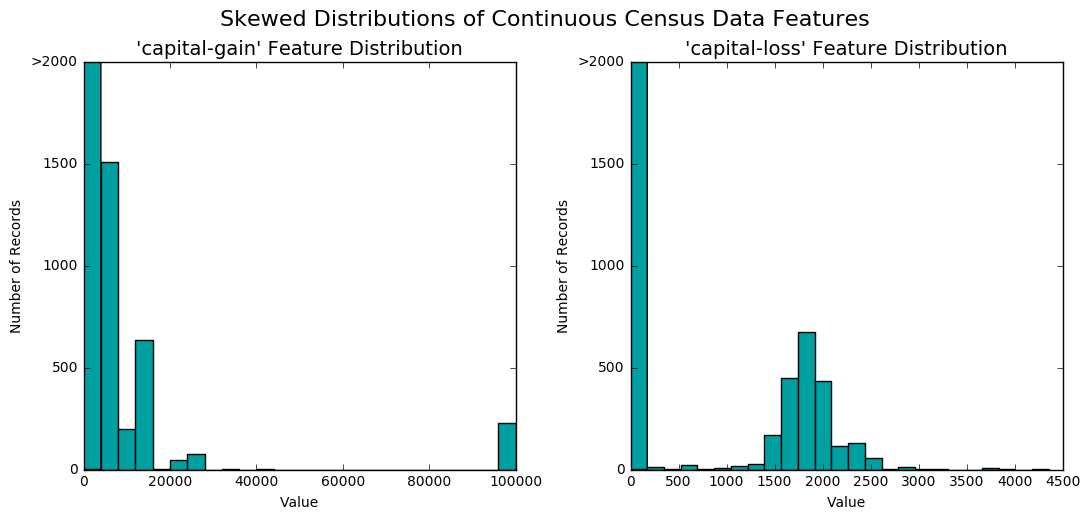

In [5]:
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
vs.distribution(data)

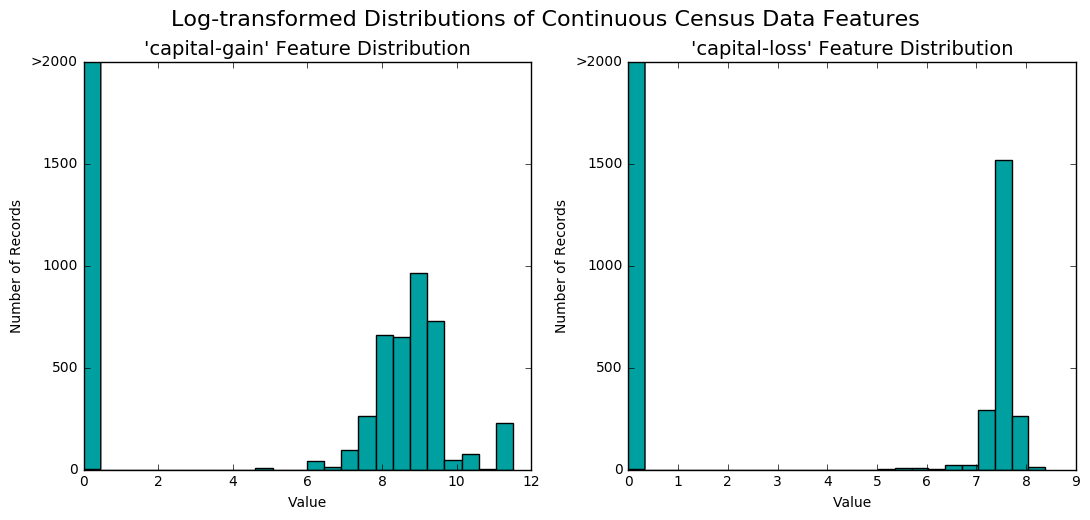

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize
vs.distribution(features_raw, transformed = True)

### 3a). Numerical Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### 3b). One-Hot Encoding Categorical Features

One-hot encoding is a classic method of dealing of categorical features in a dataset. Here is an example of one-hot encoding:

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

I will now apply this to all my categorical features

In [8]:
features = pd.get_dummies(features_raw)
income = data['income'].map({"<=50K":0,">50K":1})
encoded = list(features.columns)

print "{} total features after one-hot encoding.".format(len(encoded))
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

## 4). Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. I  will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


## 5). Create a Naive Predictor

I am first going to naive predictor as a base-line reference to compare future models to.

In [11]:
true_negative = 0
false_positive = n_at_most_50k
false_negative = 0
true_positive = n_greater_50k

recall = float(true_positive) / float(false_negative + true_positive)
precision = float(true_positive) / float(false_positive + true_positive)
accuracy = float(true_negative + true_positive) / float(n_records)
fscore = (1 + (0.5)**2) * ((precision*recall)/((0.5**2)*precision + recall))

print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


## 6). Create Supervised Learning Models

There are many supervised learning models I can use to solve this problem; I will compare the pros and cons to three I find suitable.

**Random Forest**

Random forest algorithms are used often for data mining and creating models with seemingly irrelevant features. Trevor John Hastie said random forests "come[s] closest to meeting the requirements for serving as an off-the-shelf procedure for data mining". [https://en.wikipedia.org/wiki/Random_forest] When researching further Ricardo Vladimiro, (Lead Data Scientist at Miniclip) said the following about random forests: "As with most tree based models, random forests behave worse than simple linear models when there are strong linear relationships between feature and target variable. On the other hand it behaves really well when irrelevant features are present or these features have skewed distributions."[https://www.quora.com/What-is-the-best-use-case-for-random-forests] Based on my research there aren't obvious domain applications of random forests, they seem to be used where-ever seen fit. Strengths: good at picking up complex relationships between seemingly unrelated features, also good at generalizing. Weaknesses: random forests seem to have trouble with smaller datasets, especially when easier linear relationships are present. Good fit: I believe this method would do well on the problem because our data is larger and has seemingly unrelated features. Plus we need a model that won't overfit the data. Random forests are good at not overfitting their data.

**Support Vector Machines**

Support Vector Machines (SVMs) are generally used for binary classification, though can be modified in such a way as to create multi-class predictions. Some examples of binary classification could be spam detection, cancer detection, fraud detection, ect. Each of these examples look to find a binary "on off" situation in the data. Ganesh Paramesearan, machine learning researcher, says "Support Vector Machines are primarily for binary classification. SVMs have the advantage (compared to decision trees) that you can use them for non-linear decision boundaries. But the disadvantage is that you can't attribute meaning (like why the features being x result in the sample being classified y). SVMs also take a really long time to train." [https://www.quora.com/What-are-the-typical-use-cases-for-different-machine-learning-algorithms] Some further use cases I found are for facial recognition and partical location detection. Both can be found in the following document [http://tdlc.ucsd.edu/events/boot_camp_2009/tingfansvm.pdf]. Strengths: great algorithm for binary classification. Weakness: long training time, can attribute class meaning. Good fit: the data we're working with is not *too* large, so I believe SVM would do a decent job at classifying the data. Plus this project is a binary classification task, so it's worth giving SVMs a shot! 

**K-Nearest Neighbors**

K-Nearest Neighbors, or KNNs, is a form of instance based learning, or lazy learning, that just takes in account the K nearest points to a given input. The learning time for KNNs is very short, but the query time can be long. An in introduction to KNNs says "It is also a lazy algorithm. What this means is that it does not use the training data points to do any generalization. In other words, there is no explicit training phase or it is very minimal." [https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/]. This can be extremely useful when the data is very large. Use cases for KNNs involve nearest neighbor based content retrieval, gene expression, and protein-protein interaction and 3D structure prediction. These examples are listed in more detail on the previous link. Strengths: KNNs is non parametric which means it does not make assumptions about underlying data distributions (very handy in complex messy data). Weaknesses: Using KNNs often for prediction can take a lot of compute time because it has to make a complex-ish computation every time a prediction is calculated. Normal learning models take time up front, but then have a model predictions can be run through. Good fit: I believe this model could be a good fit because the data may be too large to train the models in good time. Also, the relationship between the features may be well express in terms of distance in n-demensional space.

### 6a). Create a Training and Predicting Pipeline to Accelerate Testing
I want to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. So I'm going to create a training pipeline to help me do this an efficently as possible.

In [50]:

from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train.iloc[0:sample_size, :], y_train.iloc[0:sample_size])
    end = time() # Get end time
    
    results['train_time'] = (end - start)
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[0:300, :])
    end = time() # Get end time

    results['pred_time'] = (end - start)
            
    results['acc_train'] = accuracy_score(y_train.iloc[0:300], predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train.iloc[0:300], predictions_train, beta = 0.5)
        
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

### 6b). Test and Train Models

I'm going to train three different supervised models and compare **accuracies, F-scores, and training-times** across various cuts of the data (1%, 10%, and 100%). This way I can get an indepth look at how the models perform compared to one another.

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


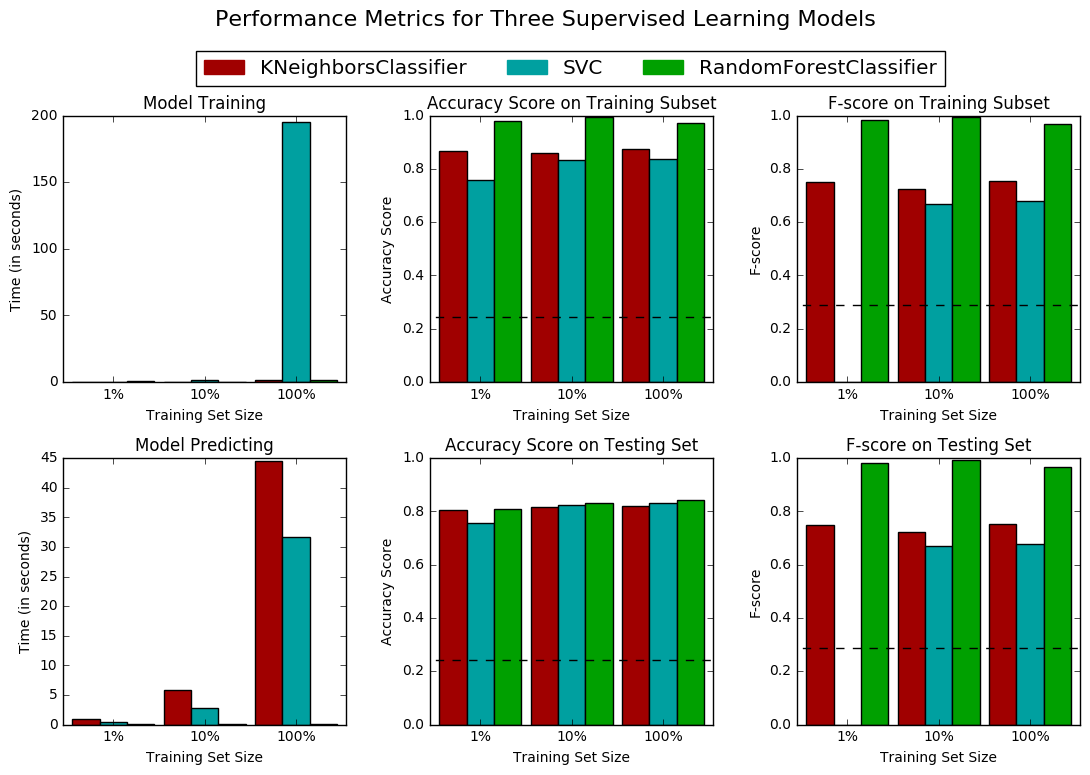

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

clf_A = RandomForestClassifier(random_state=42)
clf_B = SVC(random_state=42)
clf_C = KNeighborsClassifier()

samples_1 = int(round(X_train.shape[0] / 100))
samples_10 = int(round(X_train.shape[0] / 10))
samples_100 = int(round(X_train.shape[0] / 1))

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

vs.evaluate(results, accuracy, fscore)

### 6c). Interpret Results

Based on the above metrics gathered the three learning algorithms chosen, **the random forest algorithm is by far the best classifier**. This decision is easy to make because the random forest classifier out performs the others in EVERY METRIC. Let's start by examining the model's training time: we can't even see how long the models took because the SVM took so long to train. Its training time seems to have grown exponentially as new data was added. Now when looking at the accuracy score on the training data, at first it appears the random forest algorithm was overfitting because it was getting neat perfect accuracy, but notice that the accuracy actually *went down* between the 10% and 100% set sizes. This shows that the random forest algorithm did initially overfit the data, but then became more generalized after it trained on all the data. This was a known defect to the random forest algorithm discussed earlier, this algorithm needs a lot of data to generalize properly. Now when examining the F-score on training data, once again it appears the random forest has overfit the data to achieve such high scores, but really it has just learned the patterns well. I say this because the F-scores on the testing set of data are equally as high. The other algorithms seemed to cap out their F-score around 0.8.

Now let's examine the model predicting time metric. This is a shocking metric because it shows how great the random forest is on time. At 100% of the training data, the other models take 30 and 45 seconds, while the random forest seems to take 1, maybe 2, seconds. This shows the random forest method is 20, maybe 30, times faster than the other options at predicting the data. Now let's examine the accuracy scores on the testing set. Here is where all the algorithms seem to hit their limit. Random forest does perform better than the other methods, but not hugely better (only several percentage points). Finally the F-score on the testing set once again favors the random forest algorithm over the SVM and the KNN methods. So in conclusion, the random forest algorithm is the best choice (of these three models) for identifying people who make more than 50,0000 dollars.

## 7). Tune the RandomForrest Classifer Via GridSearch

In [66]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state = 42)

# parameters list I'm using to tune
parameters = {"n_estimators" : [5, 10, 50, 100, 250],
             "criterion" : ["gini", "entropy"],
             "max_features" : ["auto", "log2"]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8431
F-score on testing data: 0.6843

Optimized Model
------
Final accuracy score on the testing data: 0.8429
Final F-score on the testing data: 0.6824


### 7a). Interpret Results

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.2478                |  0.8431               |  0.8429         |
| F-score        |    0.2917               |  0.6843                 | 0.6824         |


The optimized accuracy score is 0.8429, the optimized f-score is 0.6824. Both of these measures are worse than the unoptimized model, but MUCH better than the benchmark predictors. I am not surprised the results are much better than the benchmark predictor, but I am surprised that the optimized model is actually worse than the unoptimized model!. The accuracy went down 0.02%. I think this drop occured because the optimized model began to generalize a little bit more than the original model, but this new generalization did not help the F-score or the accuracy out perform the unoptimized model. I guess this shows the default settings in the random forest algorithm are well set for this problem.

## 8). Examine Feature Importance

I will now examine the features my classifer weighs as most important in determining an individual's salary.

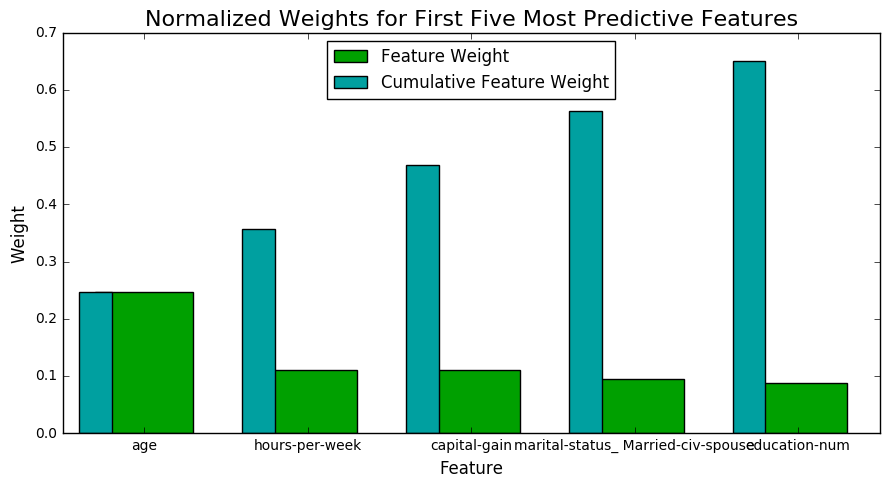

In [57]:
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
importances = model.feature_importances_
vs.feature_plot(importances, X_train, y_train)

### 8a). Graph Interpretation

What I find interesting is that education_level is not the weightiest feature (that's what my intution said). However education_num is listed as the 5th most weighted feature. I'm surprised to see this feature so low in the list, but it makes since that other factors would weigh heavier. The chart shows that age is the highest weighted feature, with a weight far above the other features. According to the chart, 0.25% of the weight in determining weather someone makes above 50K a year is in age alone! That's a shockingly large amount of weight. The feature I did not take into account when looking at this data was marital status. In hindsight it makes sense that marital status would weigh heavy in income, but I didn't catch that when I was first looking at the data.

## 9). Feature Selection

Now I want to reduce the feature space and simplify the information required for the model to learn. The code cell below will use my optimized model and train it on the same training set BUT **with only the top five important features**. 

In [58]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
reduced_predictions = clf.predict(X_test_reduced)

print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8392
F-score on testing data: 0.6748

Final Model trained on reduced data
------
Accuracy on testing data: 0.8316
F-score on testing data: 0.6585


### 9a). Investigating Feature Selection Results

I'm very shocked by these results. I can't believe the model only looses 0.7% accuracy from reducing the features down to five! The data had 103 features after one-hot encoding. Reducing that down to *5* and practically keeping the same accuracy... Just wow. Now the F-score did drop 2%, but this simplified model could be 20 times as fast. I believe that drastic increase in speed is worth the reduction F-score, and the *slight* reduction in accuracy.

With all that said though, IF (and that's a strong if) speed played NO part in the model, I could see using the original optimized model. Still speed is almost always a factor, so this feature selection is a perfect final step to optimize my classifier.